<a href="https://colab.research.google.com/github/Ganesh9100/Time_series/blob/main/Time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/Ganesh9100/Time_series.git

Cloning into 'ARIMA-And-Seasonal-ARIMA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [15]:
df=pd.read_csv('/content/ARIMA-And-Seasonal-ARIMA/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [16]:
df.columns=['Month','sales']
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df.isnull().sum()

Month    1
sales    2
dtype: int64

In [10]:
df.tail()

,Month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [20]:
df.dropna(inplace=True,how='any')

In [21]:
df.tail()

,Month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [23]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [25]:
df.set_index(df['Month'],inplace=True)  # df.set_index('Month',inplace=True)
df.head()

,Month,sales
Month,,
1964-01-01,1964-01-01,2815.0
1964-02-01,1964-02-01,2672.0
1964-03-01,1964-03-01,2755.0
1964-04-01,1964-04-01,2721.0
1964-05-01,1964-05-01,2946.0


In [27]:
df.drop(['Month'],inplace=True,axis=1)
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [29]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


**SEASONAL DATA -** example imaging this graph below is a electricty consumption on each day... we can see this graph is fluctuated with some pattern... in day we use more electricity compared to night ... we can see some pattern that peek is in day time

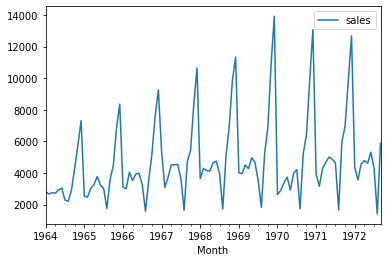

In [30]:
df.plot()

**stationarity**
It means that the statistical properties of a process generating a time series do not change over time.


**Non-Stationary**

A time series whose statistical properties change over time is called a* non-stationary time series.* 

**Example** 
Thus a time series with a trend or seasonality is non-stationary in nature. 

This is because the presence of trend or seasonality will affect the mean, variance and other properties at any given point in time.

**Why time sereis data should be stationary ???**

Because, when you infer with Non-stationary forcasted data it will not be reliable since the statistical properties are dynamic

**non-stationary data would be erroneous and misleading**

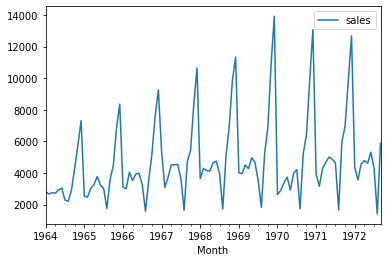

In [32]:
df.plot()  # this is a stationary time series data

**Various method to test series is stationary or not**



1.   Visualize the series check if it is trend or like seasonal 
2.   Visualize Auto Correlation function point

3.   Take n samples from series and take the mean and compare if mean for all sample is same then it is stationary

4. Do statistical Test ( Augmented Dickey Fuller Test ) famous



**Augmented Dickey Fuller Test** 

**H0 :** It is not a stationary Data 

**H1 :** It is a stationary Data 

H0 is assumed to be true 


***P-Value should be less than or equal to 0.05 to be stationary***


If it is less than 0.05 then it will make assumption  ( H0 is True )

else it will make H0 to be false ( Rejected ) and take H1 (True)

In [31]:
### Testing For Stationarity 

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
def ADFT(score):

  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','Max-infor']
  test_result = adfuller(score)
  for label,result in zip(labels,test_result):
    print(f'{label}  : {result}')

In [49]:
test_result = adfuller(df['sales'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','Max-infor']
for label,result in zip(labels,test_result):
  print(f'{label}  : {result}')

ADF Test Statistic  : -1.8335930563276228
p-value  : 0.363915771660245
#Lags Used  : 11
Number of Observations Used  : 93
Max-infor  : {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}


In [53]:
P_value = test_result[1]
if P_value <= 0.05:
  print("The series is Stationary")
else:
  print("The series is Not-Stationary")


The series is Not-Stationary


If we see the Graph of series its like seasonaliy... ( So taking differencing and check if it can be converted to stationary )

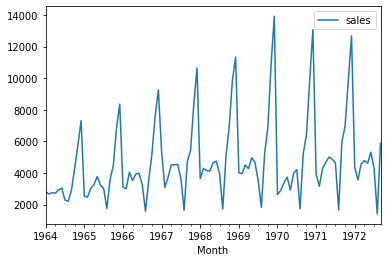

In [54]:
df.plot()

**Shifting Concept**

It will shift the value and make the first value to be Nan

In [56]:
a = [10,20,30,40,50]
a = pd.Series(a)
a

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [57]:
a.shift(1)

0     NaN
1    10.0
2    20.0
3    30.0
4    40.0
dtype: float64

In [58]:
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [61]:

df['Shifted_one_down'] = df['sales'].shift(1)
df['Shifted_one_difference'] = df['sales'] - df['Shifted_one_down']

df['Shifted_12_down'] = df['sales'].shift(12)
df['Shifted_12_difference'] = df['sales'] - df['Shifted_12_down']



In [62]:
df.head()

,sales,Shifted_one_down,Shifted_one_difference,Shifted_12_down,Shifted_12_difference
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,2815.0,-143.0,NaN,NaN
1964-03-01,2755.0,2672.0,83.0,NaN,NaN
1964-04-01,2721.0,2755.0,-34.0,NaN,NaN
1964-05-01,2946.0,2721.0,225.0,NaN,NaN


Lets plot the shifted 12 difference

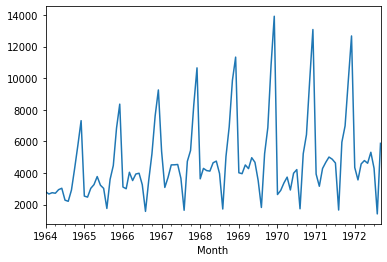

In [66]:
df['sales'].plot()

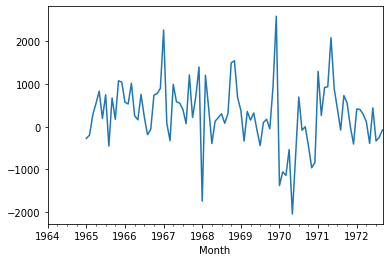

In [67]:
df['Shifted_12_difference'].plot()

shift one down to make difference will work with there is no seasonal patter 

here we have 12 months gap and its seasonal of 12 months 
so we are shifting by 12 

**after shifting we should again test with augmented dickey fuller test**

In [71]:

ADFT(df['Shifted_12_difference'].dropna())

ADF Test Statistic  : -7.626619157213164
p-value  : 2.060579696813685e-11
#Lags Used  : 0
Number of Observations Used  : 92
Max-infor  : {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}


In [72]:
2.060579696813685e-11 < 0.05

True

**Now this graph is Stationary**

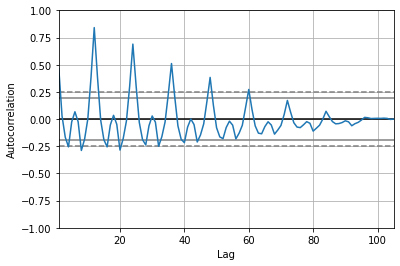

In [76]:
# How many previous data to be considered to forcast 
# to get that value we can use auto correlation or auto partial correlation



from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

Identification of an **AR model** is often best done with the **PACF.**


Identification of an **MA model** is often best done with the **ACF** 

P - AR Model Lags 

d - Differencing 

q - Moving Avg Lags 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Shifted_12_difference'].iloc[13:],lags=40,ax=ax1)  # taking rows from 12 since before rows are null 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Shifted_12_difference'].iloc[13:],lags=40,ax=ax2)  # lags is set to 40 